- 머신러닝 알고리즘은 모델의 구조가 어느정도 고정이 되어 있음.
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복 
- 딥러닝은 구조를 직접 설계해야함. 
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음.

# 손실 곡선 

- 케라스의 fit() 메소드는 History 클래스의 객체 반환 
    - History 객체: 훈련 과정에서 계산한 지표(손실,정확도)가 저장되어 있음.
    - 이 값을 사용하여 그래프를 그려서 훈련 성과 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255.0
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train,
                                                           y_train,
                                                           test_size=0.2,
                                                           random_state=4)

print(scaled_train.shape, scaled_val.shape)

(48000, 28, 28) (12000, 28, 28)


In [3]:
# 모델 정의 함수 
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', 
             metrics="accuracy")
history = model.fit(scaled_train, y_train, epochs=5)
# verbose=1 (디폴트) : 진행바, 지표 다 출력 
# verbose=2 : 진행바 빼고 지표만 출력 
# verbose=0 : 다 출력하지 않음 

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5359 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8571
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3605 - accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8847


In [6]:
# history 객체 확인 
history.history.keys()

dict_keys(['loss', 'accuracy'])

- 기본적으로 손실을 계산하고 
- compile에서 accuracy를 추가하여 loss와 accuracy가 포함됨. 
    - 원래는 'loss'만 나옴.

In [7]:
history.history

{'loss': [0.535865843296051,
  0.3974396288394928,
  0.3605014979839325,
  0.33811113238334656,
  0.3221309781074524],
 'accuracy': [0.8111875057220459,
  0.8571041822433472,
  0.8707083463668823,
  0.8789791464805603,
  0.8846874833106995]}

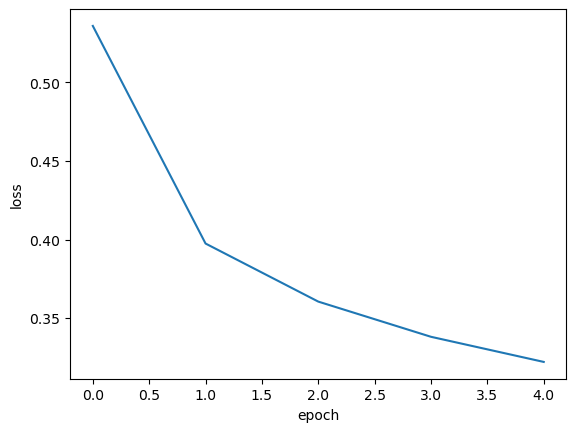

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

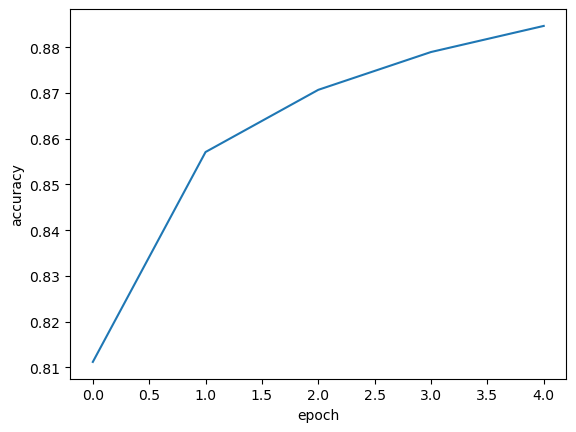

In [9]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
# epoch를 20으로 늘려서 그래프 확인 
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
history = model.fit(scaled_train, y_train, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.8086
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3992 - accuracy: 0.8565
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3617 - accuracy: 0.8704
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3395 - accuracy: 0.8778
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8843
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8898
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3013 - accuracy: 0.8926
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2893 - accuracy: 0.8975
Epoch 9/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2843 - accuracy: 0.8998
Epoch 10/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.274

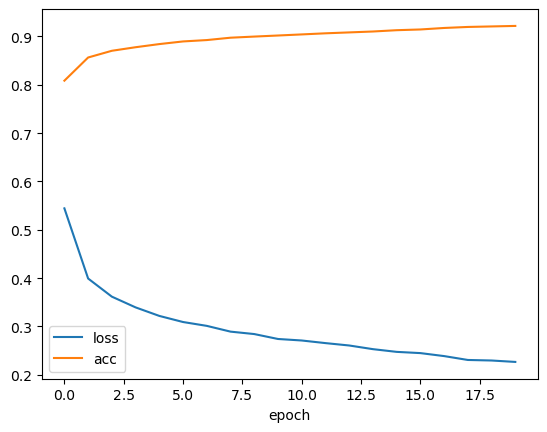

In [11]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='acc')
plt.legend()
plt.xlabel('epoch')
plt.show()

# 검증 손실 

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함. 
- 케라스에서는 fit() 메소드에 검증 데이터를 전달 가능 

In [12]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
history = model.fit(scaled_train, y_train, epochs=20, 
                   validation_data=(scaled_val, y_val))
# 배치사이즈 커지면 학습속도 좀더 빨라지고 
# 작아지면 학습속도 좀더 느려짐 

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5321 - accuracy: 0.8125 - val_loss: 0.3854 - val_accuracy: 0.8628
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3924 - accuracy: 0.8585 - val_loss: 0.3824 - val_accuracy: 0.8603
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3565 - accuracy: 0.8714 - val_loss: 0.3439 - val_accuracy: 0.8817
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3343 - accuracy: 0.8802 - val_loss: 0.3443 - val_accuracy: 0.8775
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3184 - accuracy: 0.8854 - val_loss: 0.3285 - val_accuracy: 0.8819
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3066 - accuracy: 0.8895 - val_loss: 0.3435 - val_accuracy: 0.8783
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2979 - accuracy: 0.8944 - val_loss: 0.3489 - val_accuracy:

In [13]:
history.history 

{'loss': [0.5321467518806458,
  0.39237675070762634,
  0.3565060496330261,
  0.33425989747047424,
  0.3183741867542267,
  0.30658742785453796,
  0.2979472875595093,
  0.28695207834243774,
  0.2799151539802551,
  0.2748990058898926,
  0.2683728337287903,
  0.26318103075027466,
  0.25837358832359314,
  0.2558079957962036,
  0.2477191537618637,
  0.24398769438266754,
  0.23846910893917084,
  0.2334902286529541,
  0.2330215871334076,
  0.22846201062202454],
 'accuracy': [0.8124791383743286,
  0.8584791421890259,
  0.8713958263397217,
  0.8801666498184204,
  0.8853958249092102,
  0.8894583582878113,
  0.8943958282470703,
  0.8973333239555359,
  0.9009791612625122,
  0.9007708430290222,
  0.906208336353302,
  0.9076666831970215,
  0.9089375138282776,
  0.9112291932106018,
  0.913937509059906,
  0.914187490940094,
  0.9166041612625122,
  0.9183958172798157,
  0.9193124771118164,
  0.9204583168029785],
 'val_loss': [0.38543441891670227,
  0.38244006037712097,
  0.3438575565814972,
  0.34426838

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

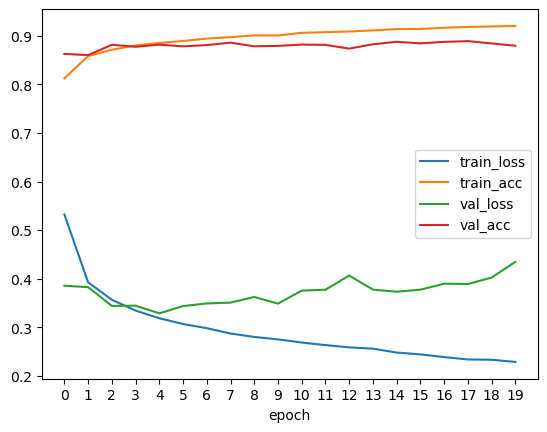

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xticks(ticks=range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐 
    - 검증 손실이 상승하는 시점을 가능한 한 뒤로 늦출 필요가 있음. 

In [4]:
# Adam 옵티마이저 선택 
model = model_fn()
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics="accuracy") 

history = model.fit(scaled_train, y_train, epochs=20, 
                    validation_data=(scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5277 - accuracy: 0.8144 - val_loss: 0.4289 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3980 - accuracy: 0.8568 - val_loss: 0.4087 - val_accuracy: 0.8522
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3566 - accuracy: 0.8718 - val_loss: 0.3545 - val_accuracy: 0.8737
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3301 - accuracy: 0.8800 - val_loss: 0.3361 - val_accuracy: 0.8794
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8864 - val_loss: 0.3266 - val_accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8919 - val_loss: 0.3124 - val_accuracy: 0.8868
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8956 - val_loss: 0.3163 - val_accuracy:

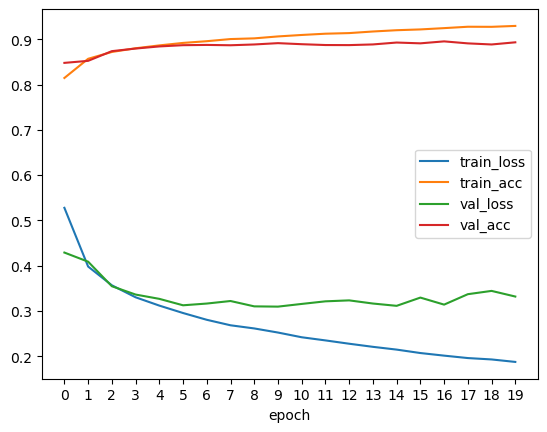

In [5]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xticks(ticks=range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()

- RMSprop을 사용할 때 보다, 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임. 
    - Adam 사용 시 최소 val_loss : 0.30
    - RMSprop 사용 시 최소 val_loss : 0.33 

# 드롭아웃 (dropout)

<img src="dropout.png">

- 훈련 과정에서 층의 일부 뉴런을 랜덤하게 끄는 것으로 (출력을 0으로 만듦으로써) 과대적합 방지
    - 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음.
    - 일부 뉴런의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨. 
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습 
- 드롭아웃은 케라스의 Dropout 클래스로 제공 
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦.
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음. 
- 드롭아웃 규제 이후, "랜덤포레스트", "앙상블 모델"과 같은 특성을 갖게 됨. 

In [6]:
# 은닉층 뒤에 드롭아웃 층 추가 
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 드롭아웃 층은 입력과 출력의 크기가 같음. (None, 100)
    - 일부 뉴런의 출력을 0으로 만들지만, 전체 출력 배열의 크기를 바꾸지 않음. 
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야 함. 
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문.
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음. 

In [7]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics="accuracy") 

history = model.fit(scaled_train, y_train, epochs=20, 
                    validation_data=(scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5926 - accuracy: 0.7932 - val_loss: 0.4284 - val_accuracy: 0.8506
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4465 - accuracy: 0.8394 - val_loss: 0.3851 - val_accuracy: 0.8609
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4084 - accuracy: 0.8520 - val_loss: 0.3498 - val_accuracy: 0.8752
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3888 - accuracy: 0.8597 - val_loss: 0.3483 - val_accuracy: 0.8698
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8643 - val_loss: 0.3391 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3620 - accuracy: 0.8662 - val_loss: 0.3343 - val_accuracy: 0.8772
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8702 - val_loss: 0.3342 - val_accuracy:

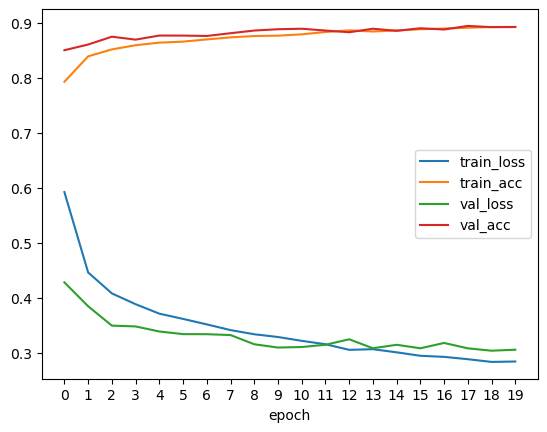

In [8]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xticks(ticks=range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨. 

# 모델 저장과 복원 

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메소드 제공 
- 모델 구조와 모델 파라미터를 저장하는 save() 메소드도 제공 

In [9]:
# .h5: 케라스에서 모델 저장 시 확장자 
model.save_weights('model/model-weights.h5') # 7만9천개의 파라미터값 저장 
model.save('model/model-whole.h5') # 모델 구조 + 파라미터값 저장 

## 모델 파라미터만 읽어오기 

In [11]:
# 똑같이 모델구조 짠 후 파라미터 불러오기 
param_model = model_fn(keras.layers.Dropout(0.3)) # 랜덤한 초기값 
param_model.load_weights('./model/model-weights.h5')
# 가중치, y절편을 똑같이 맞춰 똑같은 성능을 내도록 함. 

- load_weights() 메소드를 사용하려면 save_weights()로 저장했던 모델과 정확히 같은 구조를 가져야함. 
- 텐서플로 버전에 따라 load_weights()의 버그로 인해 evaluate()를 사용하기 전에 compile()을 반드시 실행해야 하는 경우가 있음.

     --> 정확도 구하기 수동 구현

In [14]:
# 바로 param_model.evaluate(scaled_val, y_val) 하면 오류 
# 가장 높은 레이블 예측확률의 인덱스--> 예측 레이블 (0~9)
val_labels = np.argmax(param_model.predict(scaled_val), axis=-1)
print(np.mean(val_labels==y_val)) # 정확도 

375/375 [==============================] - 1s 1ms/step
0.89275


In [15]:
y_val

array([1, 0, 6, ..., 1, 5, 0], dtype=uint8)

In [17]:
y_val.shape

(12000,)

In [16]:
# 0번 레이블일 확률, 1번 확률 ... 9번 확률 
param_model.predict(scaled_val)

375/375 [==============================] - 0s 1ms/step


array([[8.92529322e-04, 8.08150291e-01, 2.35249172e-04, ...,
        6.48859372e-16, 4.12049849e-06, 3.28335232e-12],
       [4.22693908e-01, 2.13664553e-05, 9.58742225e-04, ...,
        5.27709099e-10, 5.67249954e-05, 4.40720710e-10],
       [1.23212934e-01, 3.99944688e-10, 2.00896502e-01, ...,
        3.86627088e-15, 1.10476365e-04, 5.38360155e-13],
       ...,
       [1.17299266e-01, 2.25480020e-01, 2.67684869e-02, ...,
        5.12139046e-11, 1.27573172e-03, 4.80062878e-09],
       [9.96584542e-14, 1.29225051e-15, 7.45328219e-16, ...,
        4.60394432e-07, 1.93174282e-10, 1.82784135e-11],
       [9.49028254e-01, 1.96408422e-07, 8.25570169e-05, ...,
        2.50747679e-19, 4.95919448e-05, 3.34644480e-16]], dtype=float32)

In [18]:
param_model.predict(scaled_val).shape

375/375 [==============================] - 1s 1ms/step


(12000, 10)

In [19]:
val_labels

array([1, 6, 6, ..., 1, 5, 0], dtype=int64)

In [20]:
scaled_val

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.00784314, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.00392157, 0.        ],
        [0. 

In [21]:
scaled_val.shape

(12000, 28, 28)

- 케라스의 predict() 메소드는 모델의 예측 수행 
    - 종속변수가 10개의 클래스로 이뤄져 있기 때문에 각 클래스에 대한 확률 반환 
    
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수 사용 
    - 베열에서 가장 큰 값의 인덱스 반환 
    - 몇 번째 클래스에 대한 확률값이 가장 큰지 반환 
        - 몇 번째 클래스로 예측을 했는지 알 수 있음. 
        
- argmax() 함수의 axis=-1 은 배열의 마지막 차원을 따라서 최대값을 고른다는 뜻 
    - axis=1 이면 열을 따라 각 행의 최대값의 인덱스 선택 
    - axis=0 이면 행을 따라 각 열의 최대값의 인덱스 선택 
    
- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 1, 다르면 0
    - 이렇게 구한 값의 평균을 계산하면 정확도가 됨. 

## 모델 전체 읽어오기 

In [22]:
whole_model = keras.models.load_model('./model/model-whole.h5')
whole_model.evaluate(scaled_val, y_val)
# 마지막 epoch의 val_loss / val_accuracy 값과 동일 

375/375 [==============================] - 1s 1ms/step - loss: 0.3060 - accuracy: 0.8928


[0.30601969361305237, 0.8927500247955322]

# 콜백 (callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit() 메소드의 callbacks 매개변수에 리스트로 전달하여 사용 

## 1) ModelCheckpoint 콜백 

- 최상의 검증 점수를 만드는 모델 저장 

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.h5",
                                               save_best_only=True)
# save_best_only=True: 
# epoch 돌때마다 매번 저장한 게 아니라, 더 좋아졌을 떄만 모델만 저장해줌 
# 최종적으로는 가장 좋은 모델만 남아있음. 

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")

model.fit(scaled_train, y_train, epochs=20,
         validation_data=(scaled_val, y_val),
         callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5956 - accuracy: 0.7915 - val_loss: 0.4234 - val_accuracy: 0.8499
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4417 - accuracy: 0.8409 - val_loss: 0.3682 - val_accuracy: 0.8672
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4101 - accuracy: 0.8509 - val_loss: 0.3564 - val_accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8580 - val_loss: 0.3422 - val_accuracy: 0.8712
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3691 - accuracy: 0.8655 - val_loss: 0.3587 - val_accuracy: 0.8696
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.8696 - val_loss: 0.3373 - val_accuracy: 0.8751
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3481 - accuracy: 0.8709 - val_loss: 0.3235 - val_accuracy:

- 모델이 훈련한 후에 best-model.h5에 최적의 val_loss를 낸 모델이 저장됨. 

In [24]:
best_model = keras.models.load_model("./model/best-model.h5")
best_model.evaluate(scaled_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3050 - accuracy: 0.8950


[0.30499738454818726, 0.8949999809265137]

## 2) EarlyStopping 콜백 

- 과대적합이 시작되기 전에 (검증손실 상승 직전) 훈련을 미리 중지하는 것을 "조기종료(early stopping)"라고 부름.
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 여겨지기도 함. 

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

- patience 
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지 
- restore_best_weights 
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림. 
<br></br>
- min_delta=0.0001
- monitor='val_accuracy'

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")

history = model.fit(scaled_train, y_train, epochs=20,
                    validation_data=(scaled_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])
# history 변수저장 후 다시 돌렸더니 결과 달라짐.

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5891 - accuracy: 0.7946 - val_loss: 0.4106 - val_accuracy: 0.8532
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4382 - accuracy: 0.8411 - val_loss: 0.3774 - val_accuracy: 0.8635
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4039 - accuracy: 0.8529 - val_loss: 0.3598 - val_accuracy: 0.8728
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3837 - accuracy: 0.8600 - val_loss: 0.3417 - val_accuracy: 0.8742
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3699 - accuracy: 0.8645 - val_loss: 0.3370 - val_accuracy: 0.8758
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.8697 - val_loss: 0.3181 - val_accuracy: 0.8842
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3470 - accuracy: 0.8720 - val_loss: 0.3428 - val_accuracy:

- 최적 val_loss 0.3126 보다 두 번 더 높아졌기 때문에 종료 --> 8 epoch의 상태로 모델 종료

In [27]:
# 몇 번째 에포크에서 중지되었는지 확인 
early_stopping_cb.stopped_epoch

9

- 10 에포크까지 훈련한 후 중지됨 
    - patience 가 2기 때문에 8 에포크의 모델이 최상의 모델임. 

In [28]:
model.evaluate(scaled_val, y_val)
# 8 epoch 때의 결과와 동일 

375/375 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8873


[0.3125859498977661, 0.8872500061988831]

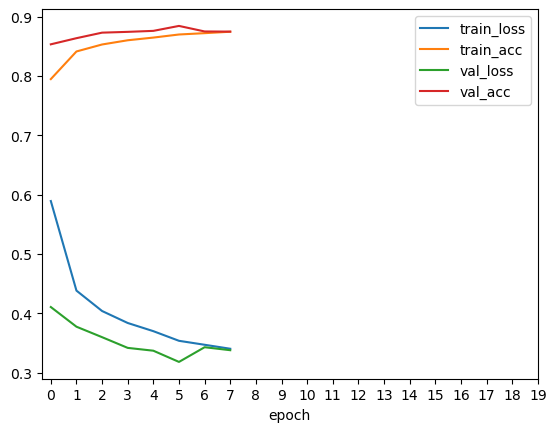

In [30]:
# 모델 학습 결과 시각화 
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xticks(ticks=range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()

In [31]:
history.history

{'loss': [0.5891495943069458,
  0.4382186233997345,
  0.4038507342338562,
  0.38368111848831177,
  0.36989322304725647,
  0.3536542057991028,
  0.34698015451431274,
  0.34027552604675293],
 'accuracy': [0.7945625185966492,
  0.8411250114440918,
  0.8528958559036255,
  0.8600000143051147,
  0.8645208477973938,
  0.8697291612625122,
  0.871958315372467,
  0.8743749856948853],
 'val_loss': [0.4105662405490875,
  0.37741875648498535,
  0.35977432131767273,
  0.3417294919490814,
  0.3369782865047455,
  0.31808367371559143,
  0.34284642338752747,
  0.337833970785141],
 'val_accuracy': [0.8531666398048401,
  0.8634999990463257,
  0.8728333115577698,
  0.8741666674613953,
  0.8758333325386047,
  0.8841666579246521,
  0.874833345413208,
  0.8745833039283752]}

In [32]:
model.evaluate(scaled_val, y_val)
# 6 epoch 때의 결과와 동일 

375/375 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8842


[0.31808367371559143, 0.8841666579246521]

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나눠서 훈련/검증 수행 
- validation_data 대신, 해당 비율만큼 검증 셋 떼서 학습 진행

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test = x_test / 255

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")

history = model.fit(scaled_train, y_train, epochs=20,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5941 - accuracy: 0.7909 - val_loss: 0.4293 - val_accuracy: 0.8407
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4352 - accuracy: 0.8437 - val_loss: 0.3785 - val_accuracy: 0.8610
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4001 - accuracy: 0.8552 - val_loss: 0.3705 - val_accuracy: 0.8656
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3770 - accuracy: 0.8627 - val_loss: 0.3553 - val_accuracy: 0.8723
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3636 - accuracy: 0.8669 - val_loss: 0.3499 - val_accuracy: 0.8710
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3521 - accuracy: 0.8705 - val_loss: 0.3560 - val_accuracy: 0.8662
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.8744 - val_loss: 0.3559 - val_accuracy:

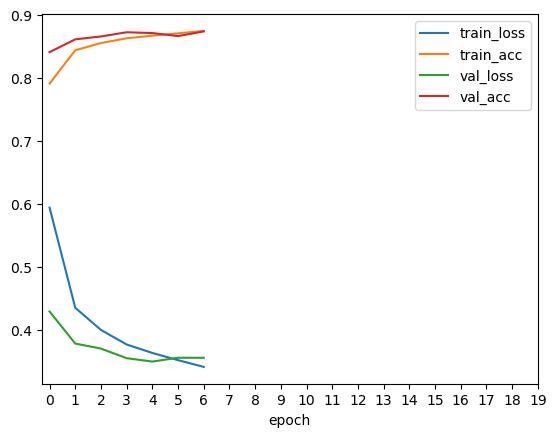

In [34]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xticks(ticks=range(20))
plt.legend()
plt.xlabel('epoch')
plt.show()